In [1]:
import numpy as np
import pandas as pd

In [39]:
crime_anal_norm = pd.read_csv('../output/02. crime_in_Seoul_final.csv', sep=',', encoding='utf-8', index_col=0)
crime_anal_raw = pd.read_csv('../output/02. crime_location.csv', encoding='utf-8', index_col=0)
tmp_max = crime_anal_norm['검거'].max()
crime_anal_norm['검거']  = crime_anal_norm['검거']/tmp_max * 100
tmp_max = crime_anal_norm['범죄'].max()
crime_anal_norm['범죄']  = crime_anal_norm['범죄']/tmp_max * 100
crime_anal_norm.head()
crime_anal_raw.head()
#crime_anal_norm.info()

,관서명,살인 발생,살인 검거,강도 발생,강도 검거,강간 발생,강간 검거,절도 발생,절도 검거,폭력 발생,폭력 검거,구별,lat,lng,검거
0,중부서,2,2,3,2,105,65,1395,477,1355,1170,중구,37.563617,126.989652,1.275416
1,종로서,3,3,6,5,115,98,1070,413,1278,1070,종로구,37.575548,126.984747,1.523847
2,남대문서,1,0,6,4,65,46,1153,382,869,794,중구,37.554758,126.973498,0.907372
3,서대문서,2,2,5,4,154,124,1812,738,2056,1711,서대문구,37.564744,126.966771,1.978299
4,혜화서,3,2,5,4,96,63,1114,424,1015,861,종로구,37.571968,126.998957,1.198382


In [4]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False
f_path='C:/Windows/Fonts/malgun.ttf'
font_name = font_manager.FontProperties(fname=f_path).get_name()
rc('font', family=font_name)

In [62]:
import folium
import json
geo_path = '../data/02. skorea_municipalities_geo_simple.json'
geo_str = json.load(open(geo_path, encoding='utf-8'))
# geo_str

In [54]:
col = ['살인 검거', '강도 검거', '강간 검거', '절도 검거', '폭력 검거']

In [95]:
map = folium.Map(location=[37.5502, 126.982], zoom_start=12, tiles='Stamen Toner')

map.choropleth(geo_data = geo_str, \
               data = crime_anal_norm['살인'], \
               columns = [crime_anal_norm.index, crime_anal_norm['살인']], \
               fill_color='BrBG', \
               key_on='feature.properties.name') # geo_data 안의 feature.id 사용

marker_cluster = folium.plugins.MarkerCluster().add_to(map)

for n in crime_anal_raw.index:
    folium.CircleMarker([crime_anal_raw['lat'][n], crime_anal_raw['lng'][n]],\
                        radius=crime_anal_raw['검거'][n]*10, color='#3186cc', \
                        fill_color='#3186cc',fill=True).add_to(map)
    folium.Marker([crime_anal_raw['lat'][n], crime_anal_raw['lng'][n]], popup=crime_anal_raw['관서명'][n]).add_to(map)
    folium.Marker([crime_anal_raw['lat'][n], crime_anal_raw['lng'][n]], overlay=True).add_to(marker_cluster)
map


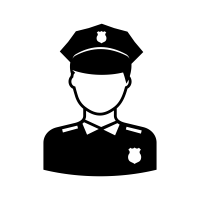
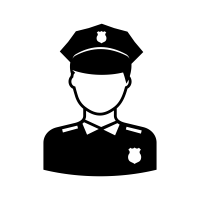
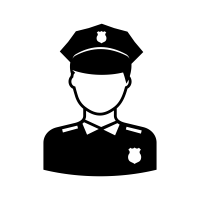
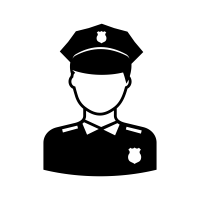
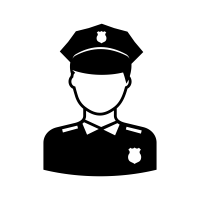
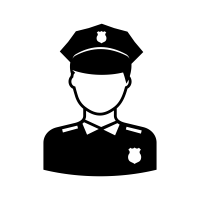
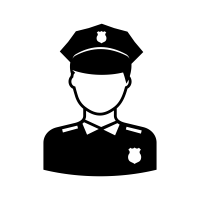
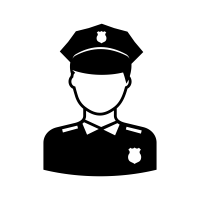
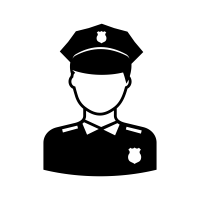
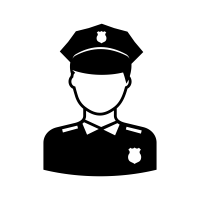
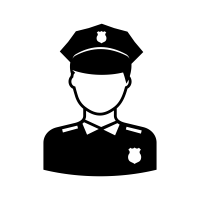
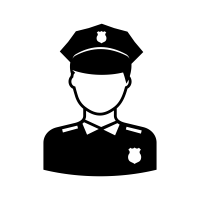
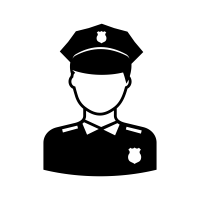
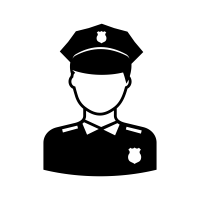
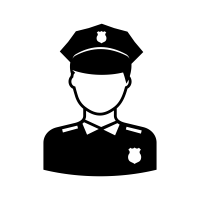
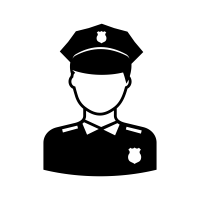
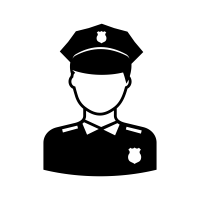
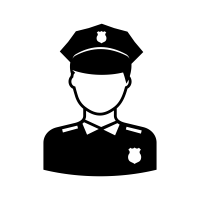
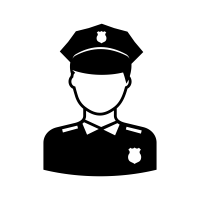
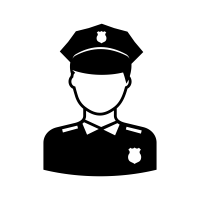
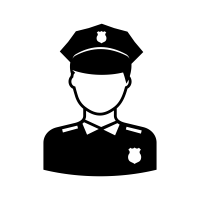
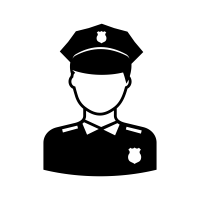
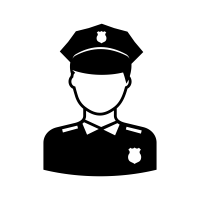
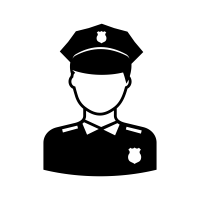
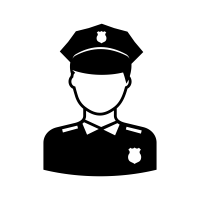
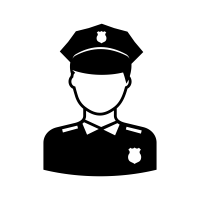
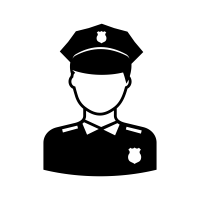
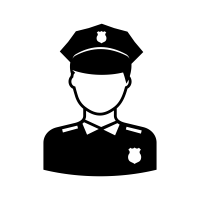
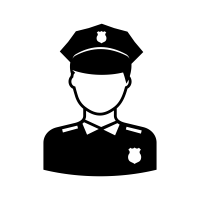
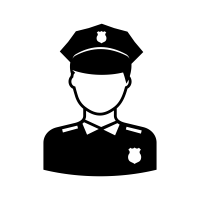
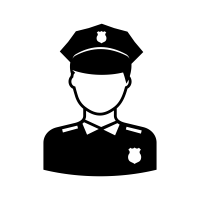

In [96]:
map = folium.Map(location=[37.5502, 126.982], zoom_start=12)#
for n in crime_anal_raw.index:
    string = f'경찰서 이름 : {crime_anal_raw["관서명"][n]} </br> 폭력 발생 수 :{crime_anal_raw["폭력 발생"][n]}'
    icon_url = '../data/police.png'
    icon = folium.features.CustomIcon(icon_url, icon_size=(45, 45))
    popup = folium.Popup(string, min_width=130, max_width=130)
    folium.Marker([crime_anal_raw['lat'][n], crime_anal_raw['lng'][n]], popup=popup, icon=icon).add_to(map)
map